In [1]:
import json, pickle, copy
import numpy as np
from evaluations import * 

In [ ]:
good_questions = np.load('Data/EEDI/good_questions.npy')
with open('Data/EEDI/good_questions_statement.json', 'r') as f:
    good_questions_statement = json.load(f)
with open('Data/EEDI/good_questions_answer.json', 'r') as f:
    good_questions_answer = json.load(f)
with open('Data/EEDI/surveys.pkl', 'rb') as f:
    surveys = pickle.load(f)

real_answers = {}
for i in range(len(good_questions)):
    question_id = good_questions[i]
    vals_i = copy.deepcopy(surveys[question_id]['IsCorrect'].values)
    real_answers[question_id] = vals_i

In [3]:
synthetic_answers_all = {} # no llama 3.1 8B here
with open('Data/EEDI/synthetic answers/iscorrect/synthetic_answers_iscorrect_3.5turbo.pkl', 'rb') as f:
    synthetic_answers_all['gpt-3.5-turbo'] = pickle.load(f)
with open('Data/EEDI/synthetic answers/iscorrect/synthetic_answers_iscorrect_4omini.pkl', 'rb') as f:
    synthetic_answers_all['gpt-4o-mini'] = pickle.load(f)
with open('Data/EEDI/synthetic answers/iscorrect/synthetic_answers_iscorrect_4o.pkl', 'rb') as f:
    synthetic_answers_all['gpt-4o'] = pickle.load(f)
with open('Data/EEDI/synthetic answers/iscorrect/synthetic_answers_iscorrect_claude.pkl', 'rb') as f:
    synthetic_answers_all['claude-3-5-haiku'] = pickle.load(f)
with open('Data/EEDI/synthetic answers/iscorrect/synthetic_answers_iscorrect_Llama-3.3-70B-Instruct-Turbo.pkl', 'rb') as f:
    synthetic_answers_all['Llama-3.3-70B'] = pickle.load(f)
with open('Data/EEDI/synthetic answers/iscorrect/synthetic_answers_iscorrect_Mistral-7B-Instruct-v0.3.pkl', 'rb') as f:
    synthetic_answers_all['Mistral-7B'] = pickle.load(f)
with open('Data/EEDI/synthetic answers/iscorrect/synthetic_answers_iscorrect_DeepSeek-V3.pkl', 'rb') as f:
    synthetic_answers_all['DeepSeek-V3'] = pickle.load(f)
with open('Data/EEDI/synthetic answers/iscorrect/synthetic_answers_iscorrect_random.pkl', 'rb') as f:
    synthetic_answers_all['random'] = pickle.load(f)

In [2]:
alphas = np.linspace(0.05, 0.5, 10)
gamma = 0.5
k_max = 50
ks = np.arange(1, k_max+1)
C = np.sqrt(2)
train_proportion = 0.6
synth_CI_type = 'Hoeffding'
rv_bound = 1
seed = 0
num_splits = 100

In [5]:
reports_interval_all, reports_point_all = get_reports_multiple(real_answers, synthetic_answers_all, good_questions, alphas, gamma, k_max, C, train_proportion, synth_CI_type = synth_CI_type, rv_bound = rv_bound, seed = seed, num_splits = num_splits)

gpt-3.5-turbo
gpt-4o-mini
gpt-4o
claude-3-5-haiku
Llama-3.3-70B
Mistral-7B
DeepSeek-V3
random


In [ ]:
# save as pickle
with open('Data/EEDI/reports_interval_all.pkl', 'wb') as f:
    pickle.dump(reports_interval_all, f)

with open('Data/EEDI/reports_point_all.pkl', 'wb') as f:
    pickle.dump(reports_point_all, f)

In [3]:
# read from pickle
with open('Data/EEDI/reports_interval_all.pkl', 'rb') as f:
    reports_interval_all = pickle.load(f)

with open('Data/EEDI/reports_point_all.pkl', 'rb') as f:
    reports_point_all = pickle.load(f)

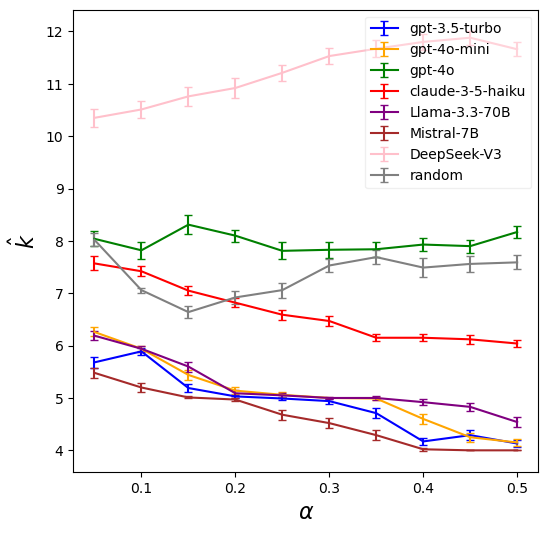

In [4]:
# all error bars are 95% confidence intervals
# metric = {'k_hat', 'synth_CI_width', 'test_miscov_rate'}
plot_reports(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma, metric = 'k_hat', type = 'interval')

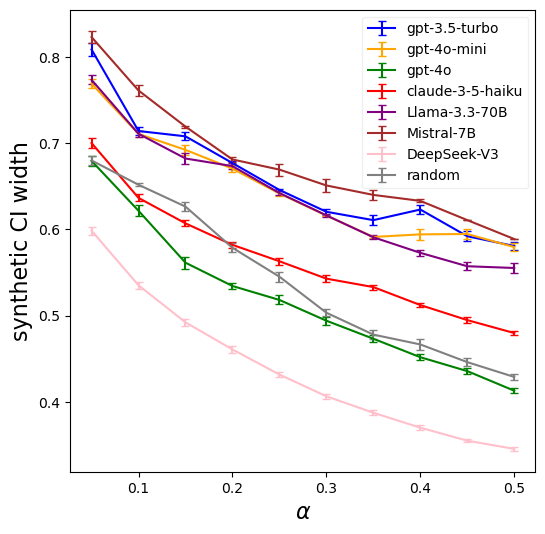

In [5]:
plot_reports(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma, metric = 'synth_CI_width', type = 'interval')

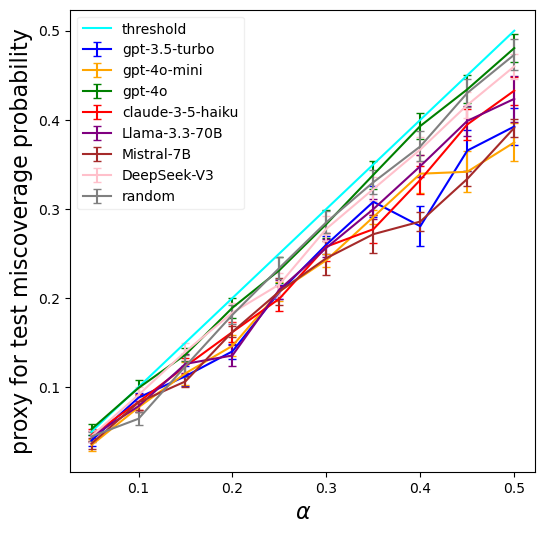

In [6]:
plot_reports(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma, metric = 'test_miscov_rate', type = 'interval')

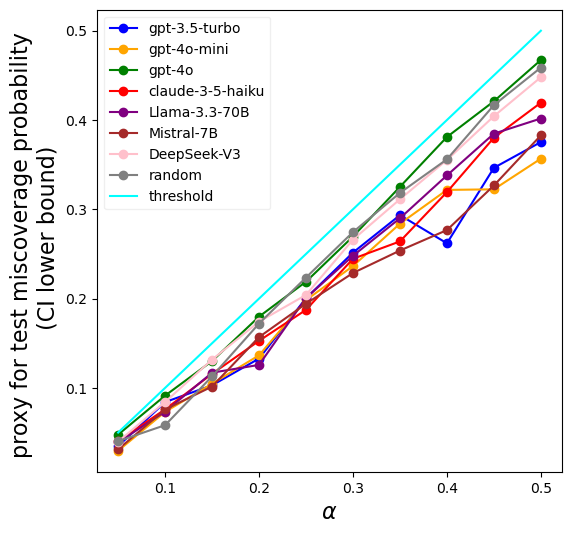

In [7]:
plot_reports(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma, metric = 'test_miscov_rate_lower', type = 'interval')

In [8]:
# columns are alphas, rows are models
# metric = {'k_hat', 'synth_CI_width', 'test_miscov_rate'}
# for 'k_hat' and 'synth_CI_width', we report the mean and 95% margin of error
# for 'test_miscov_rate', we report the mean and standard error
table = table_reports(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma, metric = 'test_miscov_rate')
table

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50
gpt-3.5-turbo,0.0401±0.0033,0.0882±0.0025,0.1122±0.0057,0.1401±0.0044,0.2067±0.0038,0.26±0.0051,0.308±0.0088,0.2806±0.0114,0.3655±0.0116,0.3925±0.0104
gpt-4o-mini,0.035±0.0033,0.0773±0.0026,0.1155±0.0066,0.1463±0.006,0.2074±0.0055,0.2425±0.0037,0.2909±0.0043,0.3395±0.0108,0.3417±0.0117,0.3747±0.0109
gpt-4o,0.0528±0.0032,0.099±0.0047,0.1365±0.0039,0.1891±0.0057,0.2313±0.0075,0.283±0.0082,0.3383±0.008,0.3931±0.0074,0.4342±0.008,0.4805±0.0081
claude-3-5-haiku,0.0461±0.0036,0.0833±0.0044,0.1234±0.0046,0.1618±0.0055,0.1993±0.0072,0.2577±0.008,0.2772±0.008,0.3326±0.0081,0.3948±0.0089,0.4327±0.0081
Llama-3.3-70B,0.0444±0.0033,0.0785±0.0031,0.1261±0.0055,0.1355±0.0059,0.2096±0.0054,0.2564±0.0051,0.2998±0.0059,0.348±0.0061,0.3988±0.0085,0.4235±0.0133
Mistral-7B,0.0366±0.0033,0.0829±0.0043,0.1064±0.003,0.1621±0.0031,0.2074±0.008,0.2447±0.0098,0.2716±0.0108,0.2858±0.0055,0.3337±0.0043,0.391±0.005
DeepSeek-V3,0.045±0.0032,0.0913±0.0043,0.1399±0.005,0.1835±0.0057,0.2153±0.0068,0.2777±0.0071,0.3223±0.0067,0.3667±0.0069,0.4166±0.0075,0.46±0.0073
random,0.0446±0.0026,0.0645±0.0038,0.1235±0.0064,0.1812±0.0055,0.2338±0.0062,0.2851±0.0065,0.3299±0.007,0.3702±0.0086,0.4302±0.0082,0.4731±0.0087


In [9]:
# columns are alphas, rows are models
p_vals = test_miscoverage(reports_interval_all, num_splits = num_splits, alphas = alphas, gamma = gamma)
p_vals

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50
gpt-3.5-turbo,0.9988,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
gpt-4o-mini,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
gpt-4o,0.1832,0.5820,0.9998,0.9732,0.9938,0.9807,0.9292,0.8259,0.9757,0.9922
claude-3-5-haiku,0.8656,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Llama-3.3-70B,0.9575,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mistral-7B,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
DeepSeek-V3,0.9444,0.9789,0.9789,0.9981,1.0000,0.9992,1.0000,1.0000,1.0000,1.0000
random,0.9800,1.0000,1.0000,0.9997,0.9954,0.9895,0.9979,0.9997,0.9920,0.9990


([<matplotlib.axis.XTick at 0x1d53bcde6d0>,
 [Text(0.05, 0, '0.05'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.25, 0, '0.25'),
  Text(0.35000000000000003, 0, '0.35'),
  Text(0.45, 0, '0.45'),
  Text(0.55, 0, '0.55'),
  Text(0.65, 0, '0.65'),
  Text(0.75, 0, '0.75'),
  Text(0.8500000000000001, 0, '0.85'),
  Text(0.9500000000000001, 0, '0.95')])

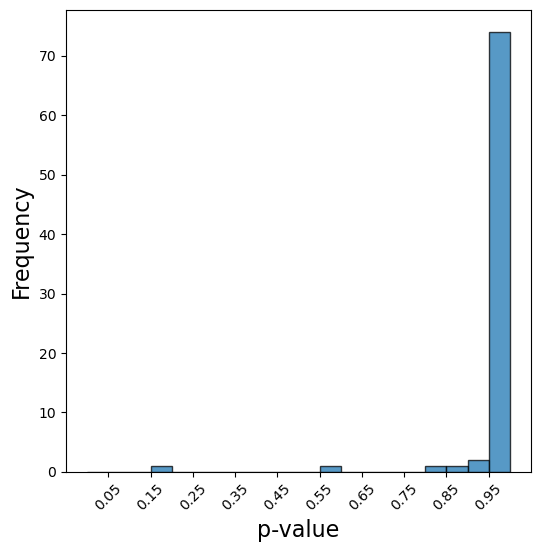

In [10]:
# draw a histogram of the p-values
p_vals_array = p_vals.values.flatten()
plt.figure(figsize = (6, 6))
plt.hist(p_vals_array, bins=np.linspace(0, 1, 21), edgecolor='black', alpha = 0.75)
plt.xlabel('p-value', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(np.linspace(0, 1, 21)[1:-1][::2], rotation=45)